In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import Perceptron


In [2]:
data_dir = "./../Data/"
data = pd.read_csv(data_dir + "long_short_covid_data1(3clus).csv")

In [3]:
data

,cough,fever,sore_throat,shortness_of_breath,head_ache,result,sixty_above,male,condition
0,0,0,0,0,0,1.0,0.0,0.0,0
1,0,0,0,0,0,1.0,0.0,0.0,0
2,0,0,0,0,0,0.0,0.0,0.0,0
3,0,0,0,0,0,0.0,0.0,1.0,1
4,0,0,0,0,0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...
186077,1,1,0,0,0,0.0,0.0,1.0,2
186078,1,0,0,0,0,0.0,0.0,0.0,0
186079,0,0,0,0,0,0.0,0.0,0.0,0
186080,0,0,0,0,0,1.0,0.0,1.0,1


In [5]:
label = data["condition"]

In [6]:
label

0         0
1         0
2         0
3         1
4         1
         ..
186077    2
186078    0
186079    0
186080    1
186081    1
Name: condition, Length: 186082, dtype: int64

In [7]:
data.drop("condition", axis=1, inplace = True)

In [8]:
data

,cough,fever,sore_throat,shortness_of_breath,head_ache,result,sixty_above,male
0,0,0,0,0,0,1.0,0.0,0.0
1,0,0,0,0,0,1.0,0.0,0.0
2,0,0,0,0,0,0.0,0.0,0.0
3,0,0,0,0,0,0.0,0.0,1.0
4,0,0,0,0,0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
186077,1,1,0,0,0,0.0,0.0,1.0
186078,1,0,0,0,0,0.0,0.0,0.0
186079,0,0,0,0,0,0.0,0.0,0.0
186080,0,0,0,0,0,1.0,0.0,1.0


In [9]:
train_X, test_X, train_y, test_y = train_test_split(data, label, test_size=0.35)

In [10]:
train_X.shape

(120953, 8)

# Support Vector Machine

In [11]:
svc = SVC()

In [12]:
svc.fit(train_X, train_y)

SVC()

In [13]:
pred = svc.predict(test_X)

In [14]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33873
           1       1.00      1.00      1.00     29268
           2       1.00      1.00      1.00      1988

    accuracy                           1.00     65129
   macro avg       1.00      1.00      1.00     65129
weighted avg       1.00      1.00      1.00     65129



<AxesSubplot:>

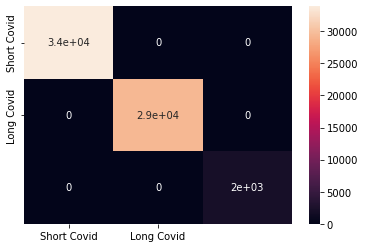

In [15]:
cm = confusion_matrix(test_y, pred)
sns.heatmap(cm, annot = True, xticklabels=["Short Covid", "Long Covid"], yticklabels=["Short Covid", "Long Covid"])

# Logistic Regression

In [16]:
lr = LogisticRegression()

In [17]:
lr.fit(train_X, train_y)

LogisticRegression()

In [18]:
pred2 = lr.predict(test_X)

In [19]:
print(classification_report(test_y, pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33873
           1       1.00      1.00      1.00     29268
           2       1.00      1.00      1.00      1988

    accuracy                           1.00     65129
   macro avg       1.00      1.00      1.00     65129
weighted avg       1.00      1.00      1.00     65129



<AxesSubplot:>

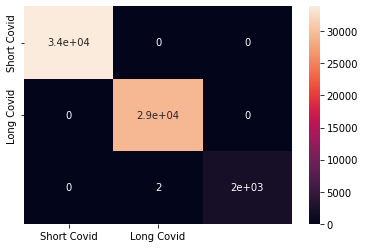

In [20]:
cm = confusion_matrix(test_y, pred2)
sns.heatmap(cm, annot = True, xticklabels=["Short Covid", "Long Covid"], yticklabels=["Short Covid", "Long Covid"])

# KNN


In [21]:
knn = KNN(n_neighbors=2)

In [22]:
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=2)

In [23]:
pred3 = knn.predict(test_X)

C:\Users\ushou\Downloads\Data Science and AI\MSc Project\project_env\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [24]:
print(classification_report(test_y, pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33873
           1       1.00      1.00      1.00     29268
           2       1.00      1.00      1.00      1988

    accuracy                           1.00     65129
   macro avg       1.00      1.00      1.00     65129
weighted avg       1.00      1.00      1.00     65129



<AxesSubplot:>

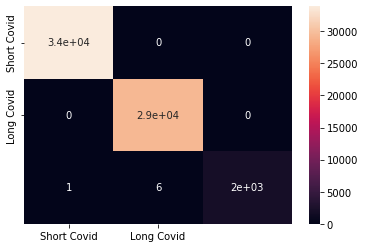

In [25]:
cm = confusion_matrix(test_y, pred3)
sns.heatmap(cm, annot = True, xticklabels=["Short Covid", "Long Covid"], yticklabels=["Short Covid", "Long Covid"])

# Perceptron

In [26]:
perceptron = Perceptron(tol=1e-3, random_state=0)

In [27]:
perceptron.fit(train_X, train_y)

Perceptron()

In [28]:
perceptron.score(test_X, test_y)

1.0

In [29]:
pred4 = perceptron.predict(test_X)

In [30]:
print(classification_report(test_y, pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33873
           1       1.00      1.00      1.00     29268
           2       1.00      1.00      1.00      1988

    accuracy                           1.00     65129
   macro avg       1.00      1.00      1.00     65129
weighted avg       1.00      1.00      1.00     65129



<AxesSubplot:>

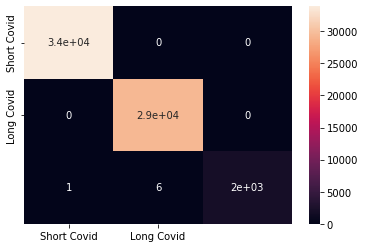

In [31]:
cm = confusion_matrix(test_y, pred3)
sns.heatmap(cm, annot = True, xticklabels=["Short Covid", "Long Covid"], yticklabels=["Short Covid", "Long Covid"])